#### Gerar e normalizar dados

In [1]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Itens faltantes
1. Integrar com o jogo para gerar os dados de teste
1. Criar o algorítmo genético
1. Ajustar o model_fit para o algorítmo genético
1. 

In [52]:
# Configuração da semente para reprodutibilidade
np.random.seed(32)

In [53]:
# Gerar dados binários de exemplo
# X,y = make_moons(n_samples=5000, noise=0.1)

In [54]:
# Dividir os dados em treinamento e teste
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [55]:
# Normalizar os dados
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

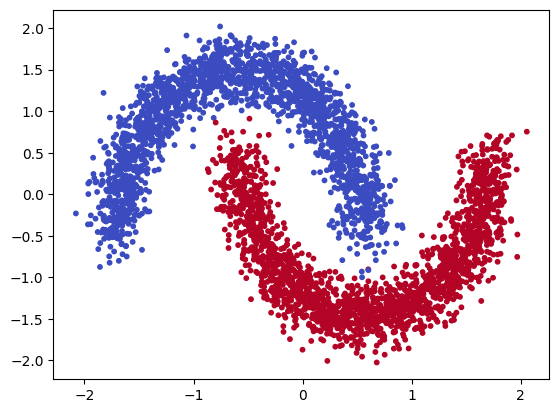

In [56]:
# plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', s=10)

#### Modelo

In [96]:
# Inicializar os pesos e bias para 3 camadas ocultas

output_layer_size = 2
w1 = np.random.randn(2, 3)
w2 = np.random.randn(3, 2)
b1 = np.zeros((1, 3))
b2 = np.zeros((1, 2))

In [79]:
# Forward
def foward(input, pw1, pw2, pb1, pb2):
    # Somatório até a camada oculta
    z1 = input.dot(pw1) + pb1
    # Aplicação da função de ativação na camada oculta
    f1 = np.tanh(z1)
    # Somatório até a camada de saída
    z2 = f1.dot(pw2) + pb2
    # Softmax
    e = np.exp(z2)
    output = e / np.sum(e, axis=1, keepdims=True)

    return output, f1, z1


In [81]:
# Backpropagation
# def backpropagation(input, output, result, f1, z1, pw1, pw2, pb1, pb2):
#     delta2 = np.copy(output)
#     delta2[range(input.shape[0]), result] -= 1
#     dw2 = (f1.T).dot(delta2)
#     db2 = np.sum(delta2, axis=0, keepdims=True)
#     delta1 = delta2.dot(w2.T) * (1 - np.power(np.tanh(z1), 2))
#     dw1 = (input.T).dot(delta1)
#     db1 = np.sum(delta1, axis=0, keepdims=True)

#     # Atualização dos pesos e bias
#     pw1 += - 0.001 * dw1
#     pw2 += - 0.001 * dw2
#     pb1 += - 0.001 * db1
#     pb2 += - 0.001 * db2

#     return pw1, pw2, pb1, pb2

In [ ]:
def genectic_algorithm(input, output, result, f1, z1, pw1, pw2, pb1, pb2):
    # Crossover
    # Mutation
    pass

# afaf

In [82]:
# Treinamento
def model_fit(epochs, inputs, results, pw1, pw2, pb1, pb2):
    for epoch in range(epochs):
        output, f1, z1 = foward(inputs, pw1, pw2, pb1, pb2)
        # pw1, pw2, pb1, pb2 = backpropagation(inputs, output, results, f1, z1, pw1, pw2, pb1, pb2)
        genectic_algorithm(inputs, output, results, f1, z1, pw1, pw2, pb1, pb2)

        #acuracia
        prediction = np.argmax(output, axis=1)
        correct = sum(prediction == results)
        accuracy = correct/results.shape[0]

        if int((epoch+1) % (epochs/10)) == 0:
            print(f'Epoch [{epoch+1} / {epochs}] - Accuracy: {accuracy:.3f}')

    return prediction, pw1, pw2, pb1, pb2


#### Fit

In [97]:
result, w1, w2, b1, b2 = model_fit(300, X_train, y_train, w1, w2, b1, b2)

Epoch [30 / 300] - Accuracy: 0.897
Epoch [60 / 300] - Accuracy: 0.876
Epoch [90 / 300] - Accuracy: 0.997
Epoch [120 / 300] - Accuracy: 0.998
Epoch [150 / 300] - Accuracy: 0.998
Epoch [180 / 300] - Accuracy: 0.999
Epoch [210 / 300] - Accuracy: 0.999
Epoch [240 / 300] - Accuracy: 0.999
Epoch [270 / 300] - Accuracy: 0.999
Epoch [300 / 300] - Accuracy: 0.999


In [93]:
print(f'W1: {w1}')
print(f'W2: {w2}')
print(f'B1: {b1}')
print(f'B2: {b2}')

W1: [[-4.77672744  2.96621829  2.80889863]
 [-2.03027206 -1.245927   -1.24771049]]
W2: [[-3.05133353  4.80835982]
 [-3.86554393  4.16728624]
 [-4.47192681  3.99241951]]
B1: [[-0.02167422  3.34429522 -3.25528892]]
B2: [[-0.19184042  0.19184042]]


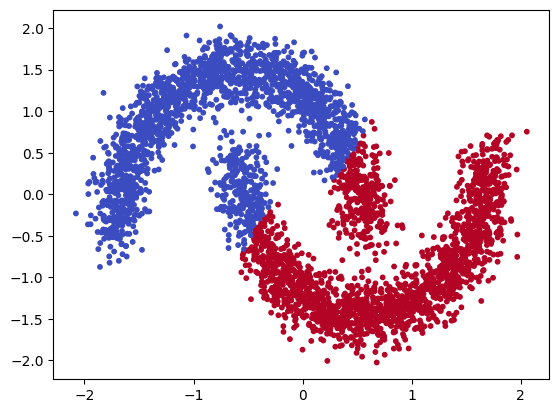

In [89]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=result, cmap='coolwarm', s=10)

In [85]:
output, f1, z1 = foward(X_test, w1, w2, b1, b2)
prediction = np.argmax(output, axis=1)

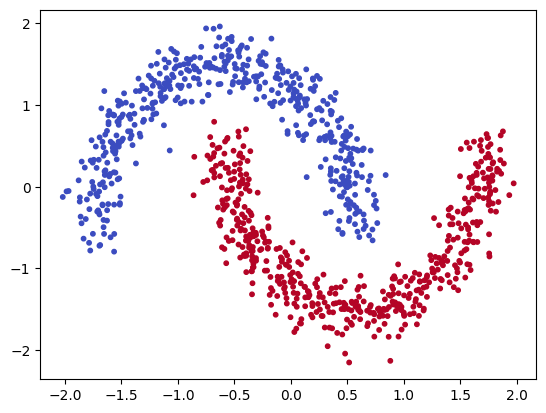

In [86]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=prediction, cmap='coolwarm', s=10)